In [39]:
import numpy
from matplotlib import pyplot

from ewatercycle.parametersetdb import build_from_urls

from hymuse.units import units
from hymuse.community.pcrglobwb.interface import PCRGlobWB

In [40]:
parameter_set = build_from_urls(
    config_format='ini', config_url='https://raw.githubusercontent.com/UU-Hydro/PCR-GLOBWB_input_example/master/RhineMeuse30min/ini_and_batch_files/rapid/setup_natural_test.ini',
    datafiles_format='svn', datafiles_url='https://github.com/UU-Hydro/PCR-GLOBWB_input_example/trunk/RhineMeuse30min',
)
# parameter_set.save_datafiles('./input')

In [41]:
parameter_set.config['globalOptions']['inputDir'] = '/data/input'
parameter_set.config['globalOptions']['outputDir'] = '/data/output'
parameter_set.save_config('config.cfg')

In [42]:
p=PCRGlobWB(bmi_mode="grpc+docker")

In [43]:
p.parameters.ini_file="config.cfg"
print(p.parameters)

ini_file: config.cfg



In [44]:
p.commit_parameters()
print(p.data_store_names())
grid=p.grid_0

['grid_0']


In [45]:
print(grid)
print(grid.cellsize())
minpos=grid.get_minimum_position()
maxpos=grid.get_maximum_position()
extent=[minpos[1].number,maxpos[1].number,minpos[0].number,maxpos[0].number]


CartesianGrid (13 x 17) (accumulated_land_surface_baseflow, accumulated_land_surface_runoff, accumulated_total_surface_runoff, bare_soil_evaporation, baseflow, bottom_elevation_of_lowermost_layer, bottom_elevation_of_uppermost_layer, channel_storage, consumptive_water_use_for_irrigation_demand, consumptive_water_use_for_non_irrigation_demand, desalination_source_abstraction, desalination_source_abstraction_volume, direct_runoff, discharge, domesticWaterConsumptionVolume, domesticWaterWithdrawalVolume, domestic_water_withdrawal, evaporation_from_irrigation, evaporation_from_irrigation_volume, flood_innundation_depth, flood_innundation_volume, fossil_groundwater_abstraction, fossil_groundwater_storage, fraction_of_desalinated_water_allocation, fraction_of_non_fossil_groundwater_allocation, fraction_of_other_water_source_allocation, fraction_of_surface_water, fraction_of_surface_water_allocation, groundwater_capillary_rise, groundwater_depth_for_layer_1, groundwater_depth_for_layer_2, gro

In [46]:
tbegin=p.model_time
dt=p.time_step
tend=tbegin+5*dt

In [47]:
while p.model_time<tend:
    p.evolve_model(p.model_time+p.time_step)
    print(p.model_time-tbegin)

1.0 day
2.0 day
3.0 day
4.0 day
5.0 day


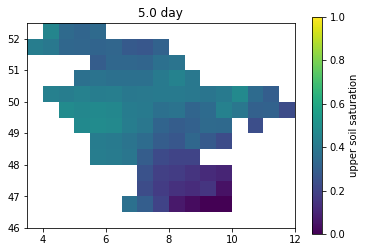

In [48]:
f=pyplot.figure()
ussd=grid.upper_soil_saturation_degree
pyplot.imshow(ussd.number, origin="lower",vmin=0, vmax=1, extent=extent)
pyplot.title(str(p.model_time-tbegin))
cb=pyplot.colorbar()
cb.set_label("upper soil saturation")